In [1]:
from ff_environment import TargetReach
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = TargetReach(space_padding=2, discover=True)
env_info = env.reset()

In [3]:
# size of each action
action_size = env.action_size
print('Size of each action:', action_size)

# examine the state space 
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:', state)

Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]


In [4]:
# Instantiate the agent:
agent = Agent(state_size, action_size, random_seed=2)

In [5]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 2000, print_every=250, stop=False)

Episode 0 	Average Reward: -10.00
Episode 2 	Average Reward: -10.00

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 250 	Average Reward: -10.00
Episode 500 	Average Reward: 6.3240
Episode 750 	Average Reward: -10.00
Episode 1000 	Average Reward: -10.00
Episode 1250 	Average Reward: -10.00
Episode 1500 	Average Reward: -10.00
Episode 1750 	Average Reward: -10.00
Episode 1999 	Average Reward: -10.00

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

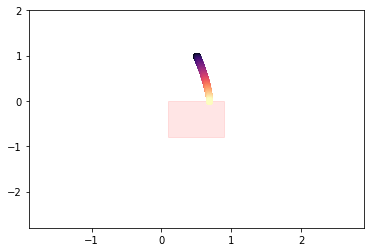

In [6]:
trajectories.plot(430, legend=False)

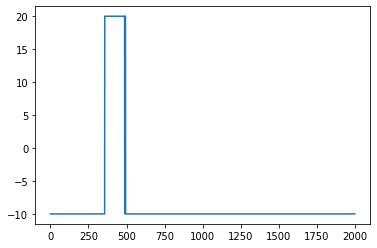

In [7]:
plt.plot(scores)